# Factor Analysis


### Why using it ?
When you want to explain a latent variable (variable that can't be measurable, but that can be estimated from other) ie in classification case, decompose an observation in components

### What it does ?

https://scikit-learn.org/stable/modules/decomposition.html#fa

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html#sklearn.decomposition.FactorAnalysis.transform

https://scikit-learn.org/stable/auto_examples/decomposition/plot_pca_vs_fa_model_selection.html#sphx-glr-auto-examples-decomposition-plot-pca-vs-fa-model-selection-py

https://towardsdatascience.com/factor-analysis-101-31710b7cadff

### How to do it ?

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.metrics import f1_score

# Load avocado data into a Pandas dataframe
avocados_enhanced_no_label = pd.read_csv('../ressources/avocados_enhanced_no_label.csv', sep=',',index_col=0)
avocado_features = avocados_enhanced_no_label.drop('type_id', axis=1)
avocado_target = avocados_enhanced_no_label['type_id']

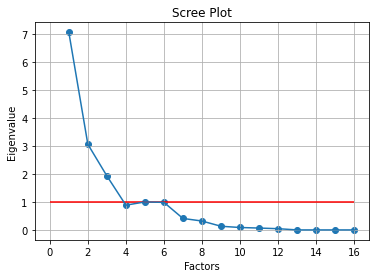

In [ ]:
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Create a new data set without the colum "day_of_week" as we seen that its always the same value
avocado_features_to_keep = avocado_features.drop(['day_of_week'], axis=1)

#using linalg from numpy, extract the eigen values from the avocado dataset
values = LA.eigvals(avocado_features_to_keep.corr())

# using Matplotlib or Seaborn, draw a scree plot of the previous calculated eigen values

plt.scatter(range(1,values.size+1),values)
plt.plot(range(1,values.size+1),values)
plt.hlines(1, 0, values.size, colors='r')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# based on the scree test, how many factor should we kept if we want to reduce the avocado dataset ?

In [ ]:
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd
from sklearn.metrics import f1_score
# We are going go try to predict the type of an avocado to mesure the relevance of our reduced dataset
# We are going to use a linear support vectore machine for solving this classification problem.
# First, we need a reference score, we are going to apply the algorithm on all the data

avocado_features_columns = list(avocado_features.columns)

# use the train_test_split function to create 4 dataset :
# avocado_features_train, avocado_features_test, avocado_target_train, avocado_target_test
avocado_features_train, avocado_features_test, avocado_target_train, avocado_target_test = train_test_split(avocado_features, avocado_target, test_size=0.20, random_state=42)

# initiate the LinearSVC model
linear_svc_model = LinearSVC()
# fit the data on the train data and target
linear_svc_model.fit(avocado_features_train,avocado_target_train)
#Score the prediction score on the test data and target
print(linear_svc_model.score(avocado_features_test,avocado_target_test))

avocado_target_predicted = linear_svc_model.predict(avocado_features_test)

print(f1_score(avocado_target_test, avocado_target_predicted))


0.8336986301369863
0.8015691402419092


/home/clement/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [ ]:
# In this contexte, the algorithm doesn't perform well
# The linear SVC use distance calculation to perform its prediction.
# we are going to normalize or data in order to reduce the value of the distance

# use the StandardScaler to remove the mean and scaling data to unit variance
scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(avocado_features)
#removing the mean and scaling to unit variance
scaled_avocado_features = scaler.transform(avocado_features)

# Do the procedure to create the 4 datasets, train the model and score its prediction

scaled_avocado_features_train, scaled_avocado_features_test, avocado_target_train, avocado_target_test = train_test_split(scaled_avocado_features, avocado_target, test_size=0.20, random_state=42)

linear_svc_model = LinearSVC()
linear_svc_model.fit(scaled_avocado_features_train,avocado_target_train)


#print(linear_svc_model.score(scaled_avocado_features_test,avocado_target_test))


print(f1_score(avocado_target_test,linear_svc_model.predict(scaled_avocado_features_test)))


0.9297297297297297


In [ ]:
# Now that we have a score for comparaison, we are going to reduced the dataset using the factor
# and we are going to score the prediction using the reduced data set

# use the StandardScaler to remove the mean and scaling data to unit variance
scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(avocado_features)
#removing the mean and scaling to unit variance
scaled_avocado_features = scaler.transform(avocado_features)

# create the FactorAnalysis and fit it on the dataset in order to have a new dataset with only 6 columns
factor_analysis_avocado = FactorAnalysis(n_components = 2).fit(scaled_avocado_features)
# create a transformed_scaled_avocado_features dataset using the FactorAnalysis previously created
transformed_scaled_avocado_features = factor_analysis_avocado.transform(scaled_avocado_features)

# Do the procedure to create the 4 datasets, train the model and score its prediction
transformed_scaled_avocado_features_train, transformed_scaled_avocado_features_test, avocado_target_train, avocado_target_test = train_test_split(transformed_scaled_avocado_features, avocado_target, test_size=0.20, random_state=42)

linear_svc_model = LinearSVC()
linear_svc_model.fit(transformed_scaled_avocado_features_train,avocado_target_train)

#print(linear_svc_model.score(transformed_scaled_avocado_features_test,avocado_target_test))

print(f1_score(avocado_target_test, linear_svc_model.predict(transformed_scaled_avocado_features_test)))


# what do you think about this score compare to the 'optimal' one ?



0.8478726660544843


In [ ]:
# Print the reduced dataset and observe the 6 Factors
# Can you see a bussiness explanation of these factors ?

scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(avocado_features)
#removing the mean and scaling to unit variance
scaled_avocado_features = scaler.transform(avocado_features)

# create the FactorAnalysis and fit it on the dataset in order to have a new dataset with only 6 columns
factor_analysis_avocado = FactorAnalysis(n_components = 4).fit(scaled_avocado_features)
# create a transformed_scaled_avocado_features dataset using the FactorAnalysis previously created
transformed_avocado_features = factor_analysis_avocado.transform(scaled_avocado_features)



In [ ]:
dataset_reduced = pd.DataFrame(data=transformed_avocado_features,columns=['0','1','2','3'])
print(dataset_reduced)
dataset_reduced.describe()

              0         1         2         3
0     -1.193554  1.509494 -0.146573 -0.154824
1     -1.193554  1.508946 -0.067935 -0.026339
2     -1.193554  1.508495  0.002080 -0.097833
3     -1.193554  1.509462 -0.140053 -0.213051
4     -1.193554  1.508817 -0.048433 -0.031041
...         ...       ...       ...       ...
18244  1.948715 -1.192356 -0.354343  0.334186
18245  1.948715 -1.192364 -0.352849  0.327981
18246  1.948719 -1.196770  0.383971 -2.172972
18247  1.948716 -1.193174 -0.218509 -0.092723
18248  1.948715 -1.192388 -0.348893  0.319505

[18249 rows x 4 columns]


,0,1,2,3
count,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04
mean,-7.475709e-17,5.195617e-15,1.218696e-16,1.720970e-16
std,1.000027e+00,1.000025e+00,1.000020e+00,9.996287e-01
min,-1.253301e+00,-1.766684e+00,-3.560770e-01,-1.579115e+01
25%,-1.204301e+00,-8.559965e-01,-2.381768e-01,-2.173009e-01
50%,-1.482415e-01,-6.543791e-02,-1.925019e-01,-3.344113e-02
75%,9.078717e-01,8.892999e-01,-1.152973e-01,1.724757e-01
max,1.960375e+00,1.864337e+00,1.862175e+01,2.751645e+01


In [ ]:
# Could we reduce even more the dataset and still have a correct score ?

# Principal Component Analysis (PCA)


### Why using it ?

When you want to resume information, make linear combination

### What it does ?

The PCA intent is to looking for correlated features in order to separates then in uncorralted values called component.
Its allow us to discover wich component (ie group of features) that impact the most the variance of the target.

Linear dimensionality reduction using the Singular Value Decomposition (SVD)

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

https://fr.wikipedia.org/wiki/D%C3%A9composition_en_valeurs_singuli%C3%A8res

https://www.theanalysisfactor.com/the-fundamental-difference-between-principal-component-analysis-and-factor-analysis/

https://www.researchgate.net/post/Factor_analysis_Vs_PCA

https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e

https://www.datacamp.com/community/tutorials/introduction-t-sne


### How to do it ?

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.svm import LinearSVC
import pandas as pd

avocados_enhanced_no_label = pd.read_csv('../ressources/avocados_enhanced_no_label.csv', sep=',',index_col=0)
avocado_features = avocados_enhanced_no_label.drop(['type_id','day_of_week'], axis=1)
avocado_target = avocados_enhanced_no_label['type_id']

avocado_features_columns = list(avocado_features.columns)

scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(avocado_features)
#removing the mean and scaling to unit variance
scaled_avocado_features = scaler.transform(avocado_features)

pca_for_avocado = PCA(n_components=16).fit(scaled_avocado_features)

transformed_scaled_pca_avocado_features = pca_for_avocado.transform(scaled_avocado_features)

transformed_scaled_pca_avocado_features_train, transformed_scaled_pca_avocado_features_test, avocado_target_train, avocado_target_test = train_test_split(transformed_scaled_pca_avocado_features, avocado_target, test_size=0.20, random_state=42)

svr_model = LinearSVC()
svr_model.fit(transformed_scaled_pca_avocado_features_train,avocado_target_train)
print(svr_model.score(transformed_scaled_pca_avocado_features_test,avocado_target_test))


0.9323287671232877


In [ ]:
pd.DataFrame(pca_for_avocado.components_,columns=avocado_features_columns)

,average_price,total_volume_sold,total_plu_4046_sold,total_plu_4225_sold,total_plu_4770_sold,total_bags_sold,total_small_bags_sold,total_large_bags_sold,total_extra_large_bags_sold,year,region_id,month,day,day_of_year,week_of_year,date_id
0,-8.219178e-02,3.719408e-01,3.594410e-01,3.577051e-01,3.290872e-01,3.688144e-01,3.682856e-01,3.423681e-01,3.056264e-01,1.956818e-02,7.191748e-02,-2.040812e-02,-4.188106e-03,-2.065003e-02,-2.001416e-02,1.890969e-02
1,9.122414e-02,2.139218e-02,2.090341e-02,2.634236e-02,2.095395e-02,1.365304e-02,1.472581e-02,9.338130e-03,1.124406e-02,-2.379694e-01,9.636763e-03,5.466145e-01,3.396626e-02,5.470666e-01,5.341006e-01,-2.186892e-01
2,-2.243031e-01,1.622484e-02,2.940909e-02,3.628153e-02,6.419755e-02,-3.219615e-02,-2.560679e-02,-4.783251e-02,-5.519000e-02,-6.458879e-01,-1.345727e-03,-1.707777e-01,-3.872606e-02,-1.733720e-01,-1.659075e-01,-6.562585e-01
3,1.122835e-01,6.208099e-04,2.309480e-03,-3.563366e-03,-7.497242e-03,4.379052e-03,4.470028e-03,4.126410e-03,-1.318953e-03,-3.379587e-02,1.501661e-01,-6.910635e-02,9.770134e-01,1.030472e-02,-5.344832e-02,-3.569484e-02
4,-1.713602e-01,7.215388e-03,-1.708574e-02,2.965913e-02,8.885683e-02,1.288244e-03,1.437927e-02,-4.569958e-02,9.552755e-02,2.116331e-02,-9.587186e-01,9.462888e-03,1.708535e-01,2.337843e-02,1.421870e-02,2.180868e-02
5,9.425962e-01,2.677892e-02,-1.750500e-03,5.486833e-02,6.043039e-02,2.244297e-02,3.153720e-02,-1.157429e-02,8.057295e-02,-1.223917e-01,-1.794107e-01,-7.977574e-02,-9.892930e-02,-8.819373e-02,-9.472470e-02,-1.262364e-01
6,-3.779034e-02,-1.711456e-01,-2.242547e-01,-3.374214e-01,-3.896739e-01,1.427569e-01,1.065590e-01,1.963299e-01,7.564079e-01,-6.951877e-02,2.523900e-02,-7.680966e-03,-1.028019e-02,-8.690111e-03,-1.470020e-02,-7.023598e-02
7,-3.951673e-02,-5.816643e-02,-8.626558e-02,7.000669e-02,5.812810e-01,-2.418446e-01,-1.555679e-01,-5.381236e-01,5.000811e-01,3.861628e-02,1.386082e-01,8.913027e-03,-3.269641e-03,8.353444e-03,8.827327e-03,3.918200e-02
8,2.726164e-03,-2.026390e-01,-4.471625e-01,-1.709119e-01,5.522030e-01,1.245997e-02,-1.823965e-01,6.160579e-01,-1.078558e-01,-5.730373e-03,8.974445e-03,-3.541936e-03,1.003667e-03,-2.565972e-03,9.186204e-03,-5.897779e-03
9,9.733817e-03,2.929956e-03,-4.440008e-02,5.367614e-02,-2.304372e-02,4.186298e-03,8.104955e-03,-8.410560e-03,7.508763e-03,6.438978e-03,1.625220e-03,-4.043993e-01,1.905564e-02,-3.994869e-01,8.189564e-01,-8.800956e-03


[4.42065069e-01 1.91580156e-01 1.20812167e-01 6.25902874e-02
 6.15790788e-02 5.53424671e-02 2.56419248e-02 1.98903844e-02
 8.16960658e-03 5.42188941e-03 4.15689111e-03 2.74852860e-03
 1.55060798e-06 9.85715508e-12 1.61504879e-16 4.55971997e-33]


<AxesSubplot:>

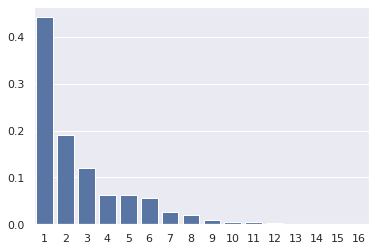

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

sns.set()

variance_ratios = pca_for_avocado.explained_variance_ratio_
print(pca_for_avocado.explained_variance_ratio_)
components = np.arange(1, pca_for_avocado.explained_variance_ratio_.size+1)


sns.barplot( x=components,y=variance_ratios,color="b")

# Evaluate Homoscedasticity

In [ ]:
import pandas as pd
from statsmodels.stats.diagnostic import het_breuschpagan,het_white
from sklearn.linear_model import LinearRegression


avocados_enhanced_no_label = pd.read_csv('../ressources/avocados_enhanced_no_label.csv', sep=',',index_col=0)
avocado_features = avocados_enhanced_no_label.drop('average_price', axis=1)
avocado_target = avocados_enhanced_no_label['average_price']

linear_regression_model = LinearRegression().fit(avocado_features,avocado_target)
avocado_predicted_target = linear_regression_model.predict(avocado_features)

het_breuschpagan_results = het_breuschpagan(avocado_target-avocado_predicted_target,avocado_features)
print(het_breuschpagan_results)


(1317.7729059383948, 7.640543932757801e-271, 94.60607220214177, 2.018064711679368e-282)


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FactorAnalysis
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd

avocados_enhanced_no_label = pd.read_csv('../ressources/avocados_enhanced_no_label.csv', sep=',',index_col=0)
avocado_features = avocados_enhanced_no_label.drop('type_id', axis=1)
avocado_target = avocados_enhanced_no_label['type_id']

avocado_features_columns = list(avocado_features.columns)

scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(avocado_features)
#removing the mean and scaling to unit variance
scaled_avocado_features = scaler.transform(avocado_features)

pca_for_avocado = FactorAnalysis(n_components=2).fit(scaled_avocado_features)

transformed_scaled_pca_avocado_features = pca_for_avocado.transform(scaled_avocado_features)

transformed_scaled_pca_avocado_features_train, transformed_scaled_pca_avocado_features_test, avocado_target_train, avocado_target_test = train_test_split(transformed_scaled_pca_avocado_features, avocado_target, test_size=0.20, random_state=42)

svr_model = LinearSVC()
svr_model.fit(transformed_scaled_pca_avocado_features_train,avocado_target_train)
print(svr_model.score(transformed_scaled_pca_avocado_features_test,avocado_target_test))


0.8638356164383562


In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
import pandas as pd

avocados_enhanced_no_label = pd.read_csv('../ressources/avocados_enhanced_no_label.csv', sep=',',index_col=0)
avocado_features = avocados_enhanced_no_label.drop('type_id', axis=1)
avocado_target = avocados_enhanced_no_label['type_id']

avocado_features_columns = list(avocado_features.columns)

scaler = StandardScaler()
#calculating the mean and variance
scaler.fit(avocado_features)
#removing the mean and scaling to unit variance
scaled_avocado_features = scaler.transform(avocado_features)

pca_for_avocado = PCA(n_components=2).fit(scaled_avocado_features)

transformed_scaled_pca_avocado_features = pca_for_avocado.transform(scaled_avocado_features)

transformed_scaled_pca_avocado_features_train, transformed_scaled_pca_avocado_features_test, avocado_target_train, avocado_target_test = train_test_split(transformed_scaled_pca_avocado_features, avocado_target, test_size=0.20, random_state=42)

svr_model = LinearSVC()
svr_model.fit(transformed_scaled_pca_avocado_features_train,avocado_target_train)
print(svr_model.score(transformed_scaled_pca_avocado_features_test,avocado_target_test))


0.8698630136986302
